<a href="https://colab.research.google.com/github/zouden/take-home-test/blob/main/MitraTakeHomePython.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mitra Bio practice analysis
## Strategy
We will compare the counts at each locus to identify statistically significant differences in the north/south groups. 

*Update:* treat A & B modifications as counts of modified/unmodified bases, and run the statistical comparison on the percentage of A counts compared to the total (A+B).

## Setup
Load values from the CSV and set up column groups.

In [36]:
## Load data into a dataframe
import pandas as pd

data = pd.read_csv('exercise_data.csv', index_col=[0,1])
data.columns = data.columns.str.split(' ', expand=True).rename(['Sample', 'Mod'])
df = data.xs('A', level='Mod',axis=1) / data.sum(axis=1, level=0)
df = pd.concat([df], axis=1,names=['Group'],keys=['north'])
df.columns.set_levels(['north','south'], level='Group', inplace=True)
df.columns.set_codes([0,0,0,1,1,1], level='Group', inplace=True)
df

Group                   north                         south                    
Sample                Sample1   Sample2   Sample3   Sample4   Sample5   Sample6
Chromosome Position                                                            
chra       6         0.000000  0.370370  0.062500  1.000000  1.000000  0.590909
           167       0.500000  0.363636  0.483871  0.117647  0.875000  1.000000
           249       0.950000  0.384615  1.000000  1.000000  1.000000  0.692308
           288       0.526316  1.000000  0.000000  0.318182  1.000000  0.400000
           329       0.464286  0.000000  0.214286  0.181818  0.818182  0.333333
...                       ...       ...       ...       ...       ...       ...
chrk       9680      0.363636  0.500000  1.000000  0.300000  0.500000  0.500000
           9701      0.764706  1.000000  0.151515  0.750000  0.535714  0.200000
           9703      0.043478  0.916667  0.666667  0.380952  0.157895  0.111111
           9837      0.761905  0.066667  0.933333  0.571429  0.363636  0.894737
           9988      0.800000  0.000000  1.000000  0.923077  0.363636  0.590909

[1100 rows x 6 columns]

## Perform Mann-Whitney U test at each position for each modification.

The Mann-Whitney U test is a non-parametric estimation of whether two groups have different medians. The output is a P value at each locus. 



In [37]:
## At each position, compare the groups.
import scipy.stats
def test_func(data):
  kstest = scipy.stats.ks_2samp(data['north'], data['south'])
  mannwhitneyu = scipy.stats.mannwhitneyu(data['north'], data['south'])
  return mannwhitneyu.pvalue
  
results = df.apply(test_func, axis=1)
results

Chromosome  Position
chra        6           0.038261
            167         0.331260
            249         0.321417
            288         0.412389
            329         0.331260
                          ...   
chrk        9680        0.321417
            9701        0.331260
            9703        0.331260
            9837        0.500000
            9988        0.500000
Length: 1100, dtype: float64

## Plot a histogram of the P values.

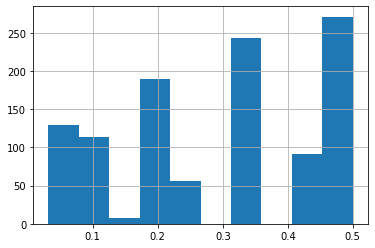

In [38]:
results.hist();

## Select most relevant loci
Select loci where the P value is below 0.05. Create a table of these positions with colour-coded values.

In [39]:
selected = df[results<=0.05]
print(len(selected), "indicative loci")
selected.sort_values(('north','Sample1')).style.background_gradient()

125 indicative loci


## Conclusion
The 125 loci above are strong candidates for identifying an individual as belonging to the North or South population. 